In [77]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection, preprocessing, cluster, metrics, mixture
import plotly.express as px
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
 #определяем алгоритм кластеризации
km = cluster.KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента силуэта
score = silhouette_score(X, km.labels_, metric='euclidean')

Значение коэффициента силуэта всегда находится в диапазоне [−1,1].

* Значение близко к −1: объекты в кластерах разрознены, и в целом кластерную структуру не удалось выделить.
* Значение близко к 0: кластеры пересекаются друг с другом.
* Значение близко к 1: чёткая кластерная структура с «плотными», отделёнными друг от друга кластерами.

### Индекс Калински — Харабаса

In [ ]:
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Калински — Харабаса
score = calinski_harabasz_score(X, km.labels_)

### Индекс Дэвиса — Болдина

In [ ]:
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Дэвиса — Болдина
score = davies_bouldin_score(X, km.labels_)

### Практика

In [28]:
X_train = np.loadtxt('data/train.txt')
y_train = np.loadtxt('data/train_labels.txt')
X_test = np.loadtxt('data/test.txt')
y_test = np.loadtxt('data/test_labels.txt')

In [17]:
y_train

array([5., 5., 5., ..., 2., 2., 2.])

In [29]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
X.shape

(10299, 561)

In [33]:
set(y)

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0}

In [35]:
ss = preprocessing.StandardScaler().fit(X)
X_scaled = ss.transform(X)
X_scaled[0][0].round(2)

0.21

In [49]:
clust_dict = {'cluster':[], 'silhouette':[], 'index_kh':[], 'index_db':[]}
for i in range(2, 9):
    km = cluster.KMeans(n_clusters=i, n_init=10, random_state=42).fit(X_scaled)
    clust_dict['silhouette'].append(metrics.silhouette_score(X_scaled, km.labels_))
    clust_dict['index_kh'].append(metrics.calinski_harabasz_score(X_scaled, km.labels_))
    clust_dict['index_db'].append(metrics.davies_bouldin_score(X_scaled, km.labels_))
    clust_dict['cluster'].append(i)
df_test = pd.DataFrame(clust_dict)
print(f"Коэффициент силуэта: {df_test.sort_values(by='silhouette', ascending=False).iloc[0].round(2)}")
print(f"Индекс Калински — Харабаса: {df_test.sort_values(by='index_kh', ascending=False).iloc[0].round(2)}")
print(f"Индекс Дэвиса — Болдина: {df_test.sort_values(by='index_db').iloc[0].round(2)}")

Коэффициент силуэта: cluster          2.00
silhouette       0.39
index_kh      7880.81
index_db         1.07
Name: 0, dtype: float64
Индекс Калински — Харабаса: cluster          2.00
silhouette       0.39
index_kh      7880.81
index_db         1.07
Name: 0, dtype: float64
Индекс Дэвиса — Болдина: cluster          2.00
silhouette       0.39
index_kh      7880.81
index_db         1.07
Name: 0, dtype: float64


In [53]:
km = cluster.KMeans(n_clusters=6, n_init=10, random_state=42, init='random').fit(X_scaled)
print(f'Однородность: {metrics.homogeneity_score(y, km.labels_).round(2)}')
print(f'Полноста: {metrics.completeness_score(y, km.labels_).round(2)}')
print(f'Скорректированный индекс Рэнда: {round(metrics.adjusted_rand_score(y, km.labels_), 2)}')

Однородность: 0.54
Полноста: 0.58
Скорректированный индекс Рэнда: 0.42


In [57]:
ct = pd.crosstab(y, km.labels_)
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
ct

,1,2,3,4,5,6
ходьба,0,0,903,78,741,0
подъём,0,0,1242,5,295,2
спуск,0,0,321,196,889,0
сидение,91,1238,1,0,0,447
стояние,0,1346,0,0,0,560
лежание,1556,54,5,0,0,329


In [59]:
km = cluster.KMeans(n_clusters=2, n_init=10, random_state=42, init='random').fit(X_scaled)
ct = pd.crosstab(y, km.labels_)
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,3))
ct

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


In [60]:
print(f'Полноста: {metrics.completeness_score(y, km.labels_).round(2)}')

Полноста: 0.98


In [61]:
aggl = cluster.AgglomerativeClustering(n_clusters=2).fit(X_scaled)
print(f'Полноста: {metrics.completeness_score(y, aggl.labels_).round(2)}')

Полноста: 1.0


### PCA

In [2]:
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A,columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())
df_std

,x1,x2,x3,x4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


In [3]:
cov_mat = np.cov(df_std.T)
cov_mat

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

In [6]:
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)
eigen_val, eigen_vectors

(array([2.51579324, 1.0652885 , 0.39388704, 0.02503121]),
 array([[ 0.16195986, -0.91705888, -0.30707099,  0.19616173],
        [-0.52404813,  0.20692161, -0.81731886,  0.12061043],
        [-0.58589647, -0.3205394 ,  0.1882497 , -0.72009851],
        [-0.59654663, -0.11593512,  0.44973251,  0.65454704]]))

In [8]:
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)

In [27]:
np.cov(np.array([3,4,1]),np.array([1,6,2])).sum().round(2)

14.33

In [31]:
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])

df = pd.DataFrame(A,columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())

#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)
principalComponents.shape

(5, 3)

###  SVD и t-SNE

In [ ]:
# создаём объект класса TruncatedSVD
# n_components — размерность нового пространства, n_iter — количество итераций
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# обучаем модель на данных X
svd.fit(X)
# применяем уменьшение размерности к матрице X
transformed = svd.transform(X)

In [ ]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE
# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и применяем к матрице X уменьшение размерности
tsne.fit_transform(X)

In [40]:
df = pd.read_csv('data/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [41]:
df.life_expec.max().round(1)

82.8

In [42]:
col = list(df.drop('country', axis=1).columns)
ss = preprocessing.StandardScaler().fit(df.drop('country', axis=1))
df_scaled = ss.transform(df.drop('country', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=col)
df_scaled.iloc[0].iloc[0].round(2)

1.29

Text(0.5, 1.0, 'Тепловая карта корреляции числовых признаков')

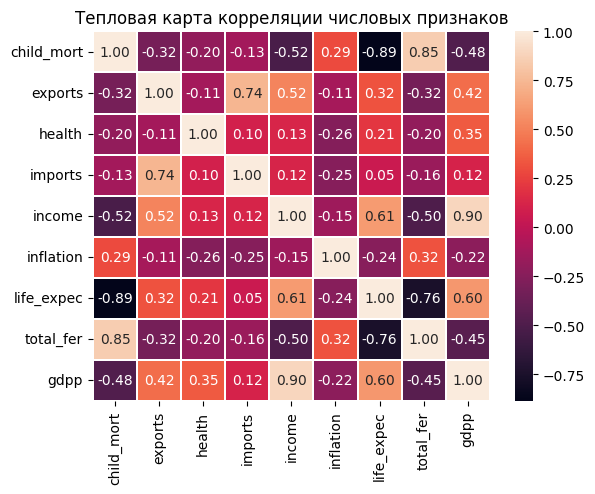

In [45]:
ax = sns.heatmap(df_scaled.corr(), fmt='.2f', linewidths=.1, annot=True)
ax.set_title('Тепловая карта корреляции числовых признаков')

In [46]:
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_scaled)
principalComponents.shape

(167, 5)

In [49]:
# Какую долю дисперсии объясняет первая главная компонента?
pca.explained_variance_ratio_[0].round(2)

0.46

Text(0.5, 1.0, 'Тепловая карта корреляции числовых признаков')

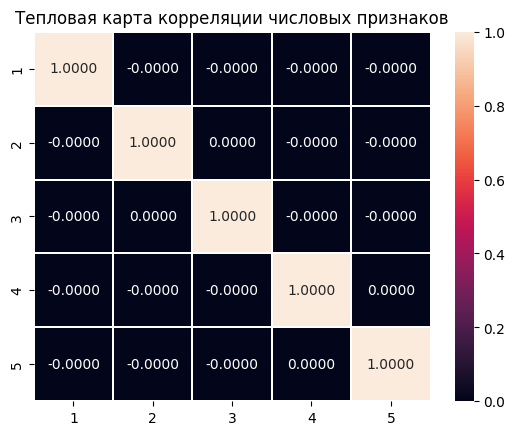

In [56]:
df_pca = pd.DataFrame(principalComponents, columns= range(1, 6))
ax = sns.heatmap(df_pca.corr(), fmt='.4f', linewidths=.1, annot=True)
ax.set_title('Тепловая карта корреляции числовых признаков')

<Axes: >

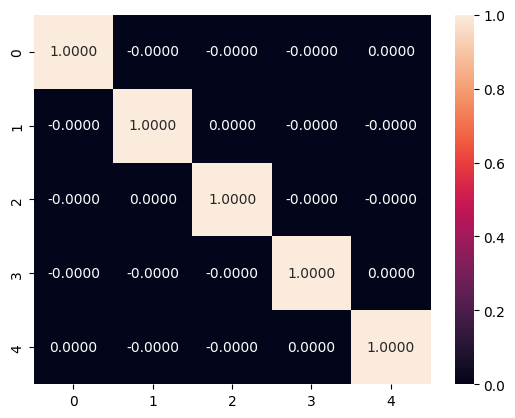

In [65]:
corrmat = np.corrcoef(df_pca.transpose())
sns.heatmap(corrmat, fmt='.4f', annot=True)

In [66]:
clust_dict = {'cluster':[], 'silhouette':[]}
for i in range(2, 11):
    km = cluster.KMeans(n_clusters=i, n_init=10, random_state=1).fit(df_pca)
    clust_dict['silhouette'].append(metrics.silhouette_score(df_pca, km.labels_))
    clust_dict['cluster'].append(i)
df_test = pd.DataFrame(clust_dict)
print(f"Коэффициент силуэта: {df_test.sort_values(by='silhouette', ascending=False).iloc[0].round(2)}")

Коэффициент силуэта: cluster       4.00
silhouette    0.32
Name: 2, dtype: float64


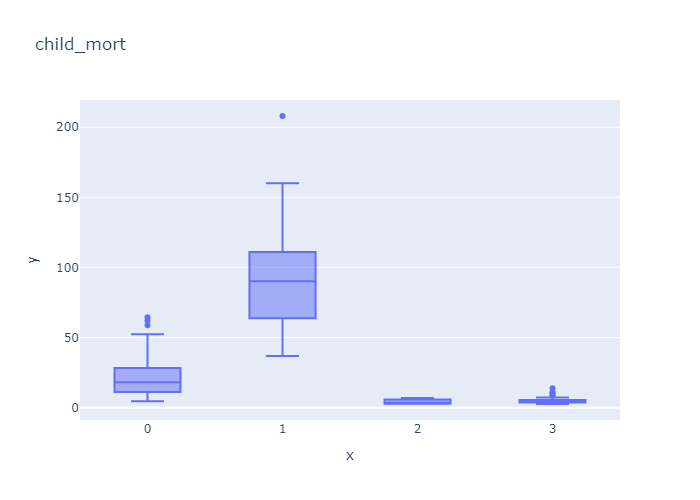

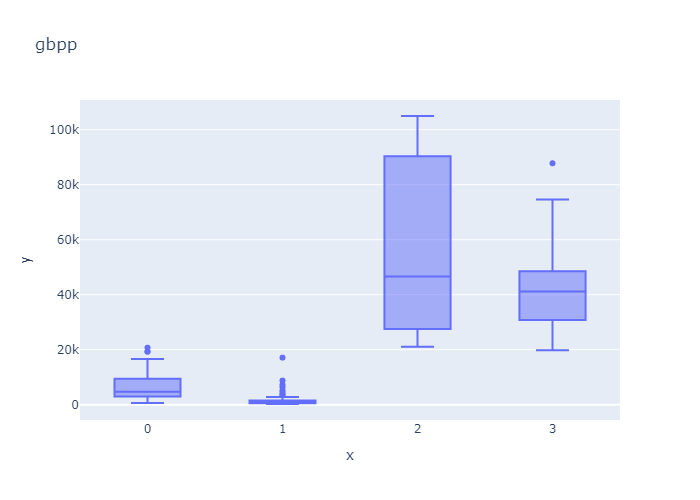

In [85]:
km = cluster.KMeans(n_clusters=4, n_init=10, random_state=1).fit(df_pca)
df['cluster'] = km.labels_

fig = px.box(y=df.child_mort, x=df.cluster, title='child_mort')
fig.show('png')

fig = px.box(y=df.gdpp, x=df.cluster, title='gbpp')
fig.show('png')

In [89]:
df[df.cluster==1].sort_values(by='life_expec').head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
